In [26]:
#imports
import numpy as np
import pandas as pd
import lasio 
from las_py import Laspy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
las = lasio.read("./data/100163203803W400_LOG.las")
mnemonic = las.keys()
print(mnemonic)

['DEPTH', 'GR', 'NPHI', 'PE', 'DEN', 'LITHOLOGY FACIES_XUEPING', 'AC']


In [28]:
data = np.loadtxt('./data/100163203803W400_LOG.las', skiprows=53)

data = pd.DataFrame(data, columns=['DEPTH', 'GR', 'NPHI', 'PE', 'DEN', 'LITHOLOGY', 'AC'])

#data_scaled = normalize(data)
#data_scaled = pd.DataFrame(data_scaled, columns=mnemonic)

data.head(10)

,DEPTH,GR,NPHI,PE,DEN,LITHOLOGY,AC
0,770.80,68.87,0.430,0.99,1.916,7.0,384.91
1,770.84,68.38,0.399,1.00,2.041,4.0,376.11
2,770.88,65.32,0.358,1.16,2.192,4.0,366.95
3,770.92,65.47,0.333,1.50,2.323,4.0,358.01
4,770.96,66.36,0.313,1.92,2.367,4.0,349.87
5,771.00,65.03,0.298,2.13,2.359,4.0,342.99
6,771.04,66.45,0.293,2.20,2.338,4.0,337.69
7,771.08,68.83,0.298,2.33,2.314,4.0,334.15
8,771.12,67.63,0.295,2.38,2.310,4.0,332.33
9,771.16,67.57,0.296,2.29,2.321,4.0,331.98


In [29]:
X = data.iloc[:,1:7]
X.drop('NPHI', inplace=True, axis=1)
X.drop('LITHOLOGY', inplace=True, axis=1)
X.head(10)

Y = data.iloc[:, 5]
Y[Y == 3] = 0
Y[Y == 4] = 1
Y[Y == 6] = 2
Y[Y == 7] = 3
Y[Y == 8] = 4
print(type(Y[0]))
Y.head(10)

<class 'numpy.float64'>


/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_52092/2609248594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('NPHI', inplace=True, axis=1)
/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_52092/2609248594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('LITHOLOGY', inplace=True, axis=1)


0    3.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: LITHOLOGY, dtype: float64

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 
model = XGBClassifier(n_estimators=100, max_depth=10, booster='gbtree',
                        objective='multi:softprob', learning_rate=0.1, random_state=0,
                        subsample=0.9, colsample_bytree=0.9,
                        eval_metric='mlogloss', reg_lambda=1500)
model.fit(X_train, Y_train)
print(model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)


In [55]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [56]:
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.80%


In [57]:
las = lasio.read("./data/102060503903W400_log.las")
mnemonic = las.keys()
print(mnemonic)

['DEPTH', 'GR', 'NPHI', 'DEN', 'PEF', 'LITHOLOGY FACIES_XUEPING', 'AC']


In [58]:
data = np.loadtxt('./data/102060503903W400_log.las', skiprows=53)

data = pd.DataFrame(data, columns=['DEPTH', 'GR', 'NPHI', 'PE', 'DEN', 'LITHOLOGY', 'AC'])

#data_scaled = normalize(data)
#data_scaled = pd.DataFrame(data_scaled, columns=mnemonic)

data.head(10)

,DEPTH,GR,NPHI,PE,DEN,LITHOLOGY,AC
0,744.195,89.281,0.264,2.379,2.502,6.0,299.626
1,744.220,87.963,0.287,2.376,2.519,6.0,295.940
2,744.245,86.645,0.264,2.371,2.469,6.0,292.254
3,744.270,85.324,0.242,2.365,2.420,6.0,288.559
4,744.271,85.273,0.241,2.364,2.418,6.0,288.415
5,744.295,84.006,0.239,2.372,2.379,6.0,284.874
6,744.296,83.952,0.239,2.372,2.377,6.0,284.721
7,744.320,82.686,0.238,2.379,2.338,6.0,281.179
8,744.322,82.563,0.238,2.380,2.336,6.0,280.870
9,744.345,80.454,0.234,2.408,2.369,6.0,276.839


In [59]:
x_new = data.iloc[:,1:7]
x_new.drop('NPHI', inplace=True, axis=1)
x_new.drop('LITHOLOGY', inplace=True, axis=1)
x_new.head(10)

y_result = data.iloc[:, 5]
y_result[y_result == 3] = 0
y_result[y_result == 4] = 1
y_result[y_result == 6] = 2
y_result[y_result == 7] = 3
y_result[y_result == 8] = 4
y_result.head(10)

/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_52092/2237517072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new.drop('NPHI', inplace=True, axis=1)
/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_52092/2237517072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new.drop('LITHOLOGY', inplace=True, axis=1)


0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: LITHOLOGY, dtype: float64

In [60]:
y_pred_test = model.predict(x_new)
print(y_pred_test)
# evaluate predictions
accuracy = accuracy_score(y_result, y_pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[2 2 2 ... 0 0 0]
Accuracy: 82.55%


In [18]:
lithology_colors  =   {0:    '#CABAAE', #brown/grey 
                        1:    '#ebe9e6', #grey
                        2:    '#00ff00', #lime green
                        3: '#000000', #black
                        4:    '#FFFF00', #yellow
                      }

In [19]:
lithology_colors  =   {0:    '#CABAAE', #brown/grey 
                        1:    '#ebe9e6', #grey
                        2:    '#00ff00', #lime green
                        3: '#000000', #black
                        4:    '#FFFF00', #yellow
                      }

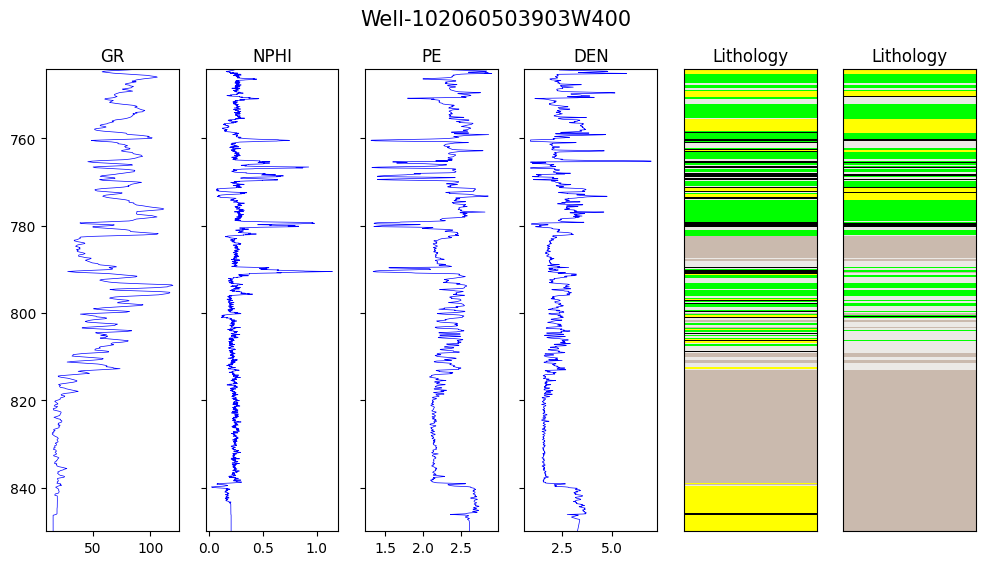

In [61]:
logs = data.columns[1:]
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)


colors = lithology_colors.values()
cmap = ListedColormap(colors)
plt.suptitle('Well-102060503903W400', size=15)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[logs[i]], data.DEPTH, color='blue', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    if i == cols-2:
        F = np.vstack((y_result, y_result)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)], cmap = cmap)
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')
    if i == cols-1:
        F = np.vstack((y_pred_test, y_pred_test)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)], cmap = cmap)
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')